In [1]:
%matplotlib inline

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import requests
import seaborn as sns

In [5]:
e = nx.read_pajek("chapter1/egypt_retweets.net")
len(e)

25178

### Use _connected_components_ instead of _connected_component_subgraphs_ for new versions of NetworkX

In [10]:
len(list(nx.connected_components(e)))

3122

(array([3.121e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.00000e+00, 1.77710e+03, 3.55320e+03, 5.32930e+03, 7.10540e+03,
        8.88150e+03, 1.06576e+04, 1.24337e+04, 1.42098e+04, 1.59859e+04,
        1.77620e+04]),
 <BarContainer object of 10 artists>)

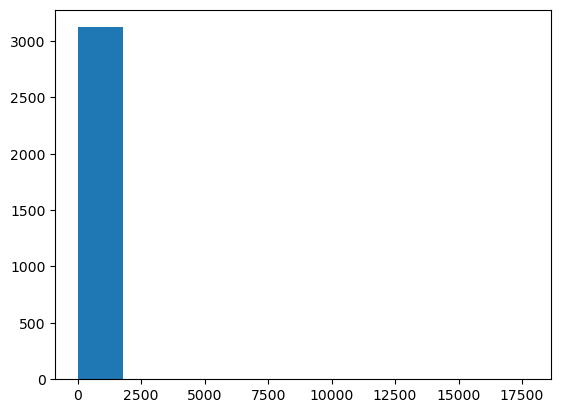

In [16]:
x = [len(c) for c in nx.connected_components(e)]
plt.hist(x)

In [17]:
[len(c) for c in nx.connected_components(e) if len(c) > 10]

[17762, 64, 16, 13, 11, 11, 14, 16]

In [48]:
def trim_edges(g, weight=1):
    """
    Takes a graph, and applies a threshold (“water level”), 
    letting all edges above a certain value through, and removing all others. 
    
    It returns a copy of the original graph, so it’s non-destructive
    """
    g2 = nx.Graph()
    for f, to, edata in g.edges(data=True):
        if edata['weight'] > weight:
            g2.add_edge(f, to, **edata)
    
    return g2

In [49]:
def island_method(g, iterations=5):
    weights = [edata['weight'] for f, to, edata in g.edges(data=True)]
    mn = int(min(weights))
    mx = int(max(weights))
    # compute the size of the step, so we get a reasonable step in iterations
    step = int((mx-mn)/iterations)
    
    return [[threshold, trim_edges(g, threshold)] for threshold in range(mn,mx,step)]

### Convert the generator of connected components to a list (to mimic the book)

In [50]:
subgraphs = list(nx.connected_components(e))

In [51]:
cc = subgraphs[0]

### Apply the island method

In [52]:
# reate the induced subgraph of the component
islands = island_method(e.subgraph(cc))

In [53]:
for i in islands:
    # print the threshold level, size of the graph, and number of connected components
    print (i[0], len(i[1]), len(list(nx.connected_components(i[1]))))

1 12360 314
62 27 11
123 8 3
184 5 2
245 5 2
